In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
top = Table.read_table('top_movies_by_title.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
101 Dalmatians,Disney,"144,880,014","869,280,100",1961
2001: A Space Odyssey,MGM,"56,954,992","377,027,700",1968
9 to 5,Fox,"103,290,500","334,062,200",1980
A Star Is Born (1976),Warner Bros.,"80,000,000","326,760,600",1976
Air Force One,Sony,"172,956,409","327,752,300",1997
Airport,Universal,"100,489,151","575,168,200",1970
Aladdin,Buena Vista (Disney),"217,350,219","456,248,400",1992
Alice in Wonderland (2010),Buena Vista (Disney),"334,191,110","365,718,600",2010
American Graffiti,Universal,"115,000,000","571,714,300",1973
American Sniper,Warner Bros.,"350,126,372","374,796,000",2014


In [3]:
#Use the group method to count how many times a categorical variable appears in a column
top.group('Studio').sort("count", descending=True)

Studio,count
Warner Bros.,29
Buena Vista (Disney),29
Fox,26
Paramount,25
Universal,22
Disney,11
Columbia,10
MGM,7
UA,6
Sony,6


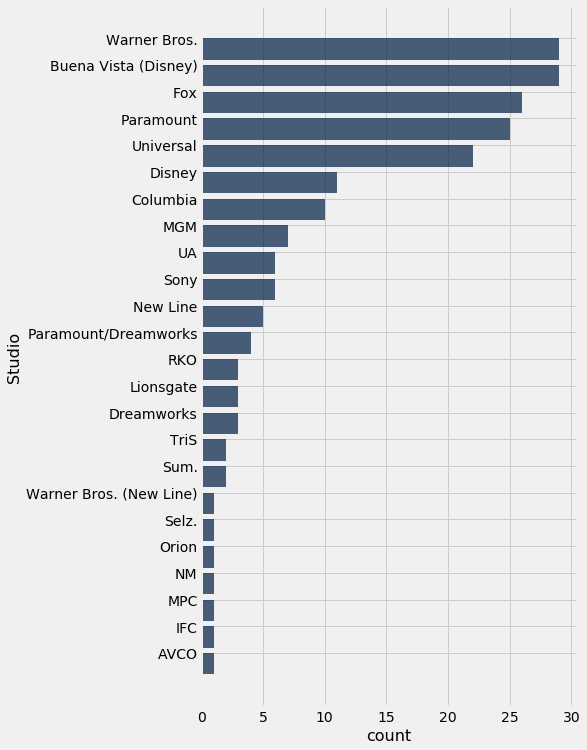

In [4]:
#How many of the top movies did each studio produce?
top.group('Studio').sort("count", descending=True).barh('Studio', 'count')

In [5]:
#How old are each of these movies?
aged = top.with_column("Age", 2018-top.column('Year'))


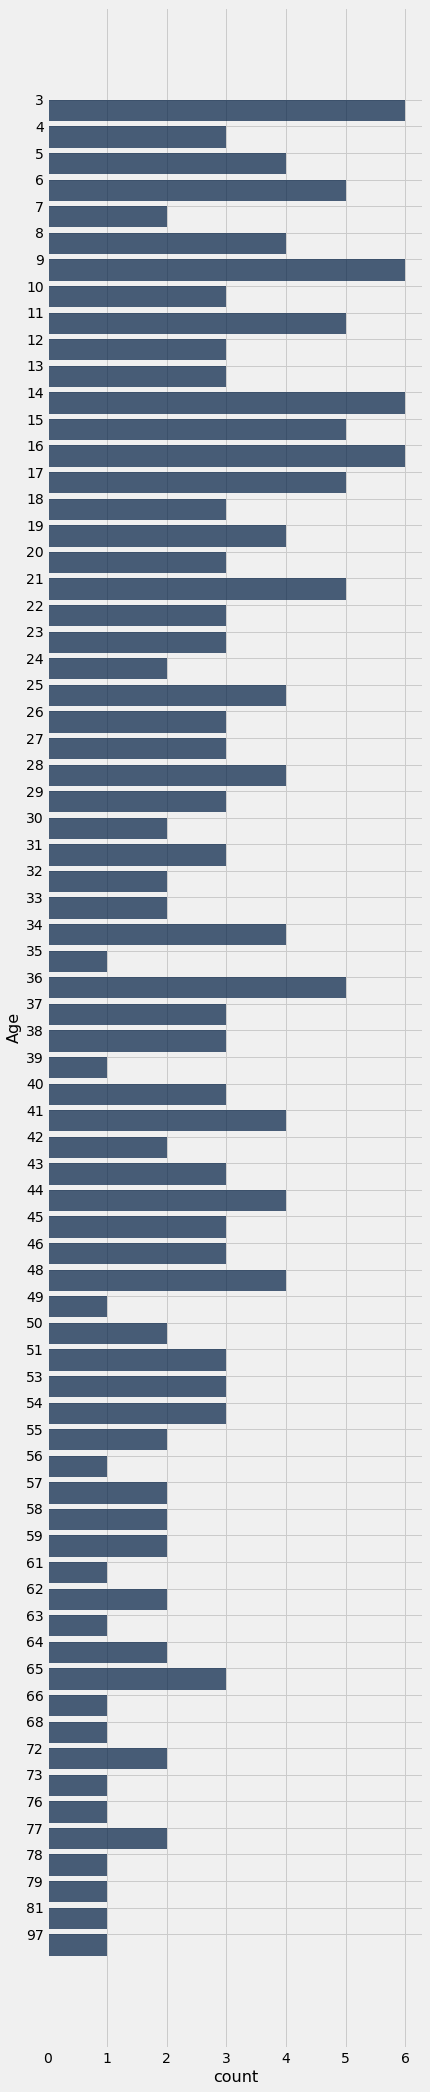

In [6]:
#How many movies of each age are there?
aged.group('Age').barh('Age', 'count')


In [7]:
aged.group('Age')


Age,count
3,6
4,3
5,4
6,5
7,2
8,4
9,6
10,3
11,5
12,3


In [8]:
#The bin method groups numbers into 10 equally spaced bins
aged.bin('Age').show()


bin,Age count
3,41
12.4,40
21.8,30
31.2,24
40.6,24
50,20
59.4,11
68.8,7
78.2,2
87.6,1


In [9]:
#You can ask the bin method to use any bins you like
aged.bin('Age', bins=[0, 20, 40, 60, 80, 100])

bin,Age count
0,73
20,59
40,47
60,19
80,2
100,0


In [10]:
#How can I make the array [0, 20, 40, 60, 80, 100] with less typing?
np.arange(0, 101, 20)

array([  0,  20,  40,  60,  80, 100])

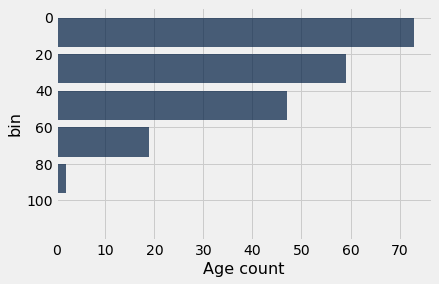

In [11]:
aged.bin('Age', bins=np.arange(0, 101, 20)).barh("bin")

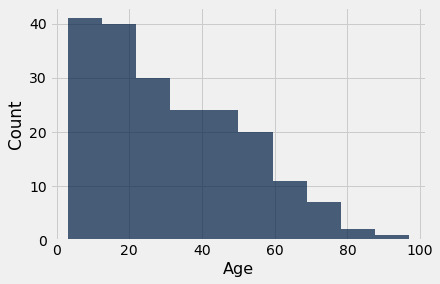

In [12]:
aged.hist('Age', normed=False)

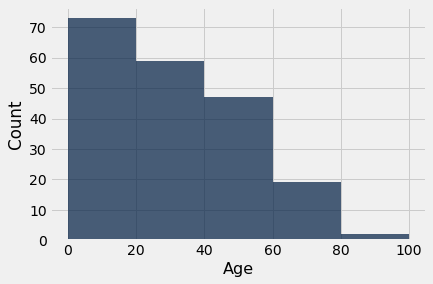

In [13]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

#What's going on in this picture?

#a) heights represent counts in each bin
#b) areas represent counts in each bin
#c) both heights and areas represent counts in each bin


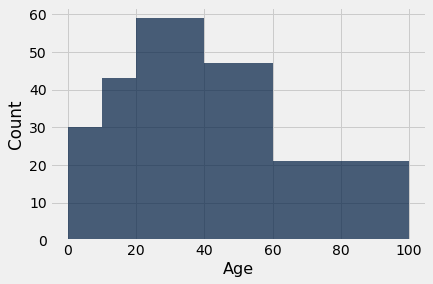

In [14]:
#There are lots of new movies, and few old movies, so let's change the bin sizes so we can see them better
aged.hist('Age', bins=[0, 10, 20, 40, 60, 100], normed=False)

#What's going on in this picture?

#a) heights represent counts in each bin
#b) areas represent counts in each bin
#c) both heights and areas represent counts in each bin

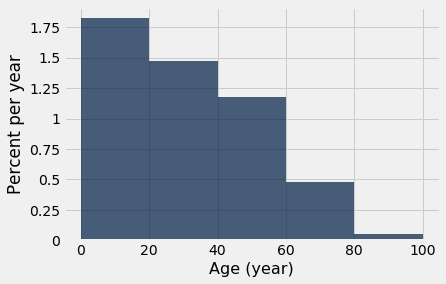

In [15]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year')


In [16]:
1.8*20

#What's going on in this picture?

#a) heights represent counts in each bin
#b) areas represent counts in each bin
#c) both heights and areas represent counts in each bin

36.0

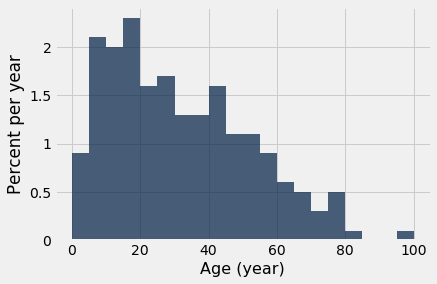

In [17]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')


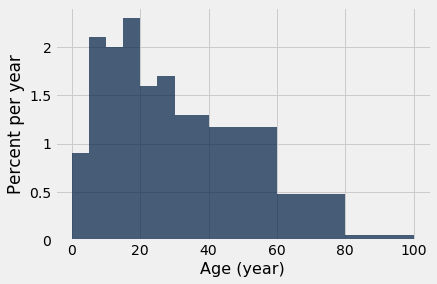

In [18]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], unit='year')

#What's going on in this picture?

#a) heights represent counts in each bin
#b) areas represent counts in each bin
#c) both heights and areas represent counts in each bin

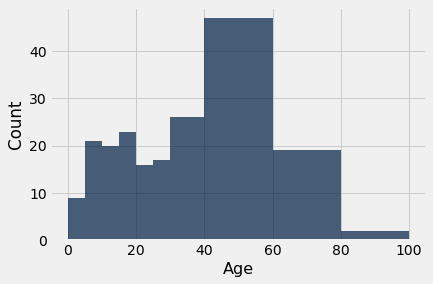

In [19]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], normed=False)


In [20]:
actress = Table.read_table('actress.csv')


In [22]:
#discussion question
#What's the height of each bar in these two histograms?

#actress.hist(1, bins=[0,15,25,85])
#actress.hist(1, bins=[0,15,35,85])

In [23]:
heights = Table.read_table('galton.csv')
heights = heights.where('gender', 'female').select('father', 'mother', 'childHeight').relabeled(2, 'daughter')
heights

father,mother,daughter
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,65.5
75.5,66.5,65.5
75,64,68
75,64,67
75,64,64.5
75,64,63
75,58.5,66.5


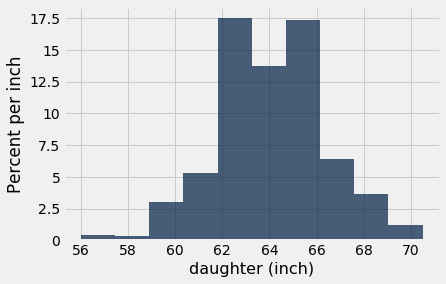

In [24]:
heights.hist('daughter', unit='inch')


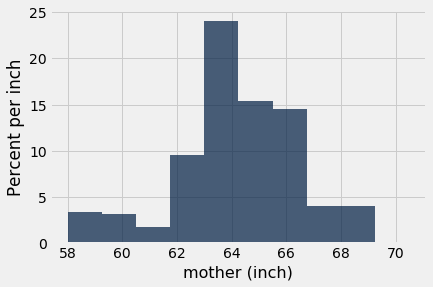

In [25]:
heights.hist('mother', unit='inch')


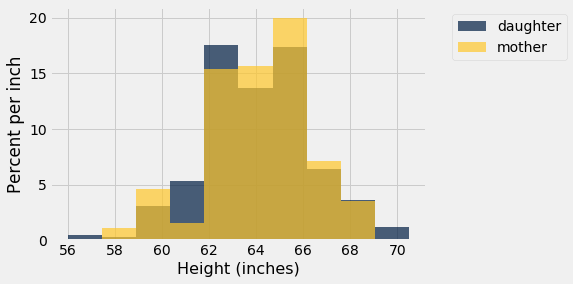

In [26]:
heights.hist('daughter', 'mother', unit='inch')
_ = plots.xlabel('Height (inches)')

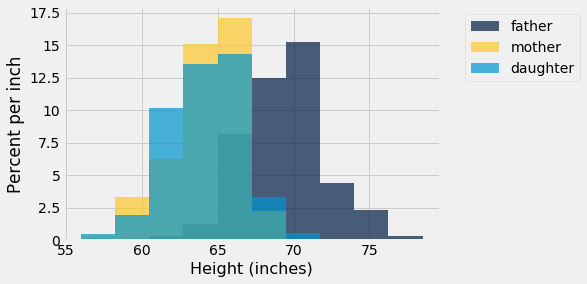

In [28]:
heights.hist(unit='inch')
_ = plots.xlabel('Height (inches)')

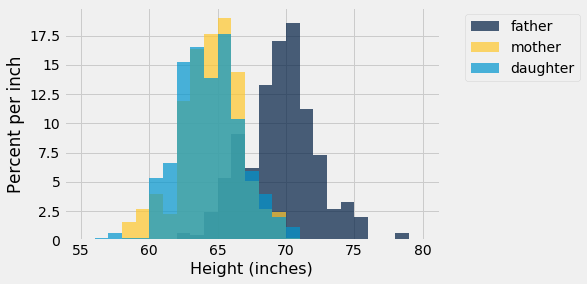

In [29]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plots.xlabel('Height (inches)')

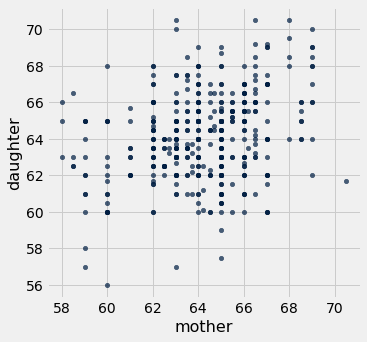

In [30]:
heights.scatter('mother', 'daughter')

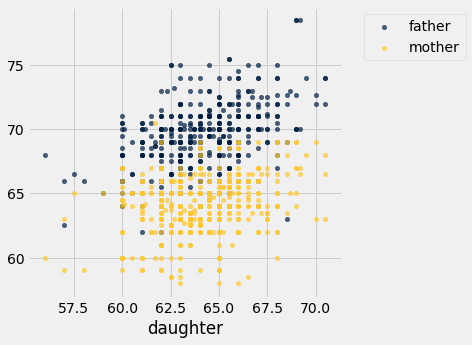

In [31]:
heights.scatter('daughter')
